## 케라스 모델 생성 방법

- Sequential 모델
- 함수형 API
- Model 서브클래싱(subclassing) -> 상속받은 클래스

### 1. Sequential 모델

- 가장 시작하기 쉬운 API
- 기본적으로 하나의 파이썬 리스트
- 단순히 층을 쌓을 수만 있음
- 하나의 입력과 하나의 출력을 가지면 순서대로 층을 쌓은 모델 표현

In [2]:
from tensorflow import keras
from keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### add() 메서드를 통해 점진적으로 모델 구성

- 파이썬의 append() 메서드와 유사

In [5]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### build() 메서드 호출로 가중치 생성

- Sequential 모델은 어떤 가중치도 가지고 있지 않음. 가중치를 생성하려면 어떤 데이터로 호출하거나 입력 크기를 지정하여 build() 메서드를 호출해야 함

In [6]:
model.weights

[]

In [7]:
model.build(input_shape=(None, 3))
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 이름 변경과 층 이름 지정

In [9]:
model = keras.Sequential(name = 'my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_lsat_layer'))
model.build(input_shape=(None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_lsat_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Input() 클래스를 사용하여 Sequential 모델의 가중치 생성

In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델에 층 추가

In [11]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,016 (3.97 KB)

 Trainable params: 1,016 (3.97 KB)

 Non-trainable params: 0 (0.00 B)

### 2. 함수형 API

- 그래프 같은 모델 구조를 주로 다룸
- 사용성과 유연상 사이의 적절한 중간 지점에 해당
- 가장 널리 사용되는 모델 구축 API
- 다중 입력, 다중 출력 또는 비선형적인 구조를 가진 모델 구성이 가능

In [13]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
inputs.shape

(None, 3)

In [15]:
inputs.dtype

'float32'

- inputs : 심볼릭 텐서(symbolic tensor)
    - 심볼릭 텐서(symbolic tensor) : 실제 데이터를 가지고 있지 않지만 사용할 때 모델이 보게 될 데이터 텐서의 사양이 인코딩되어 있음. 미래의 데이터 센서를 나타냄
        - 크기와 dtype 정보가 업데이트된 새로운 심볼릭 텐서를 반환함
- 모든 케라스 층은 실제 데이터 텐서나 심볼릭 텐서로 호출할 수 있음

In [16]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 다중 입력, 다중 출력 모델

- 예. 고객 이슈 사항에 우선순위를 지정하고 적절한 부서로 전달하는 시스템의 모델
    - 3개의 입력
        - 이슈 사항의 제목 : 텍스트 입력
        - 이슈 사항의 텍스트 본문 : 텍스트 입력
        - 사용자가 추가한 태그 : 범주형 입력(원핫인코딩되었다고 가정)
    - 2개의 출력
        - 이슈 사항의 우선순위 점수로 0과 1사이의 스칼라(시그모이드 출력)
        - 이슈 사항을 처리해야 할 부서(전체 부서 집합에 대한 소프트맥스 출력)

In [17]:
voca_size = 10000
num_tags = 100
num_depart = 4

title = keras.Input(shape=(voca_size, ), name='title')
text_body = keras.Input(shape=(voca_size, ), name='text_body')
tags = keras.Input(shape=(num_tags, ), name='tags')

features = layers.Concatenate()([title, text_body, tags]) #입력을 묶어줌
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_depart, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# pip install pydot

In [22]:
# pip install graphviz

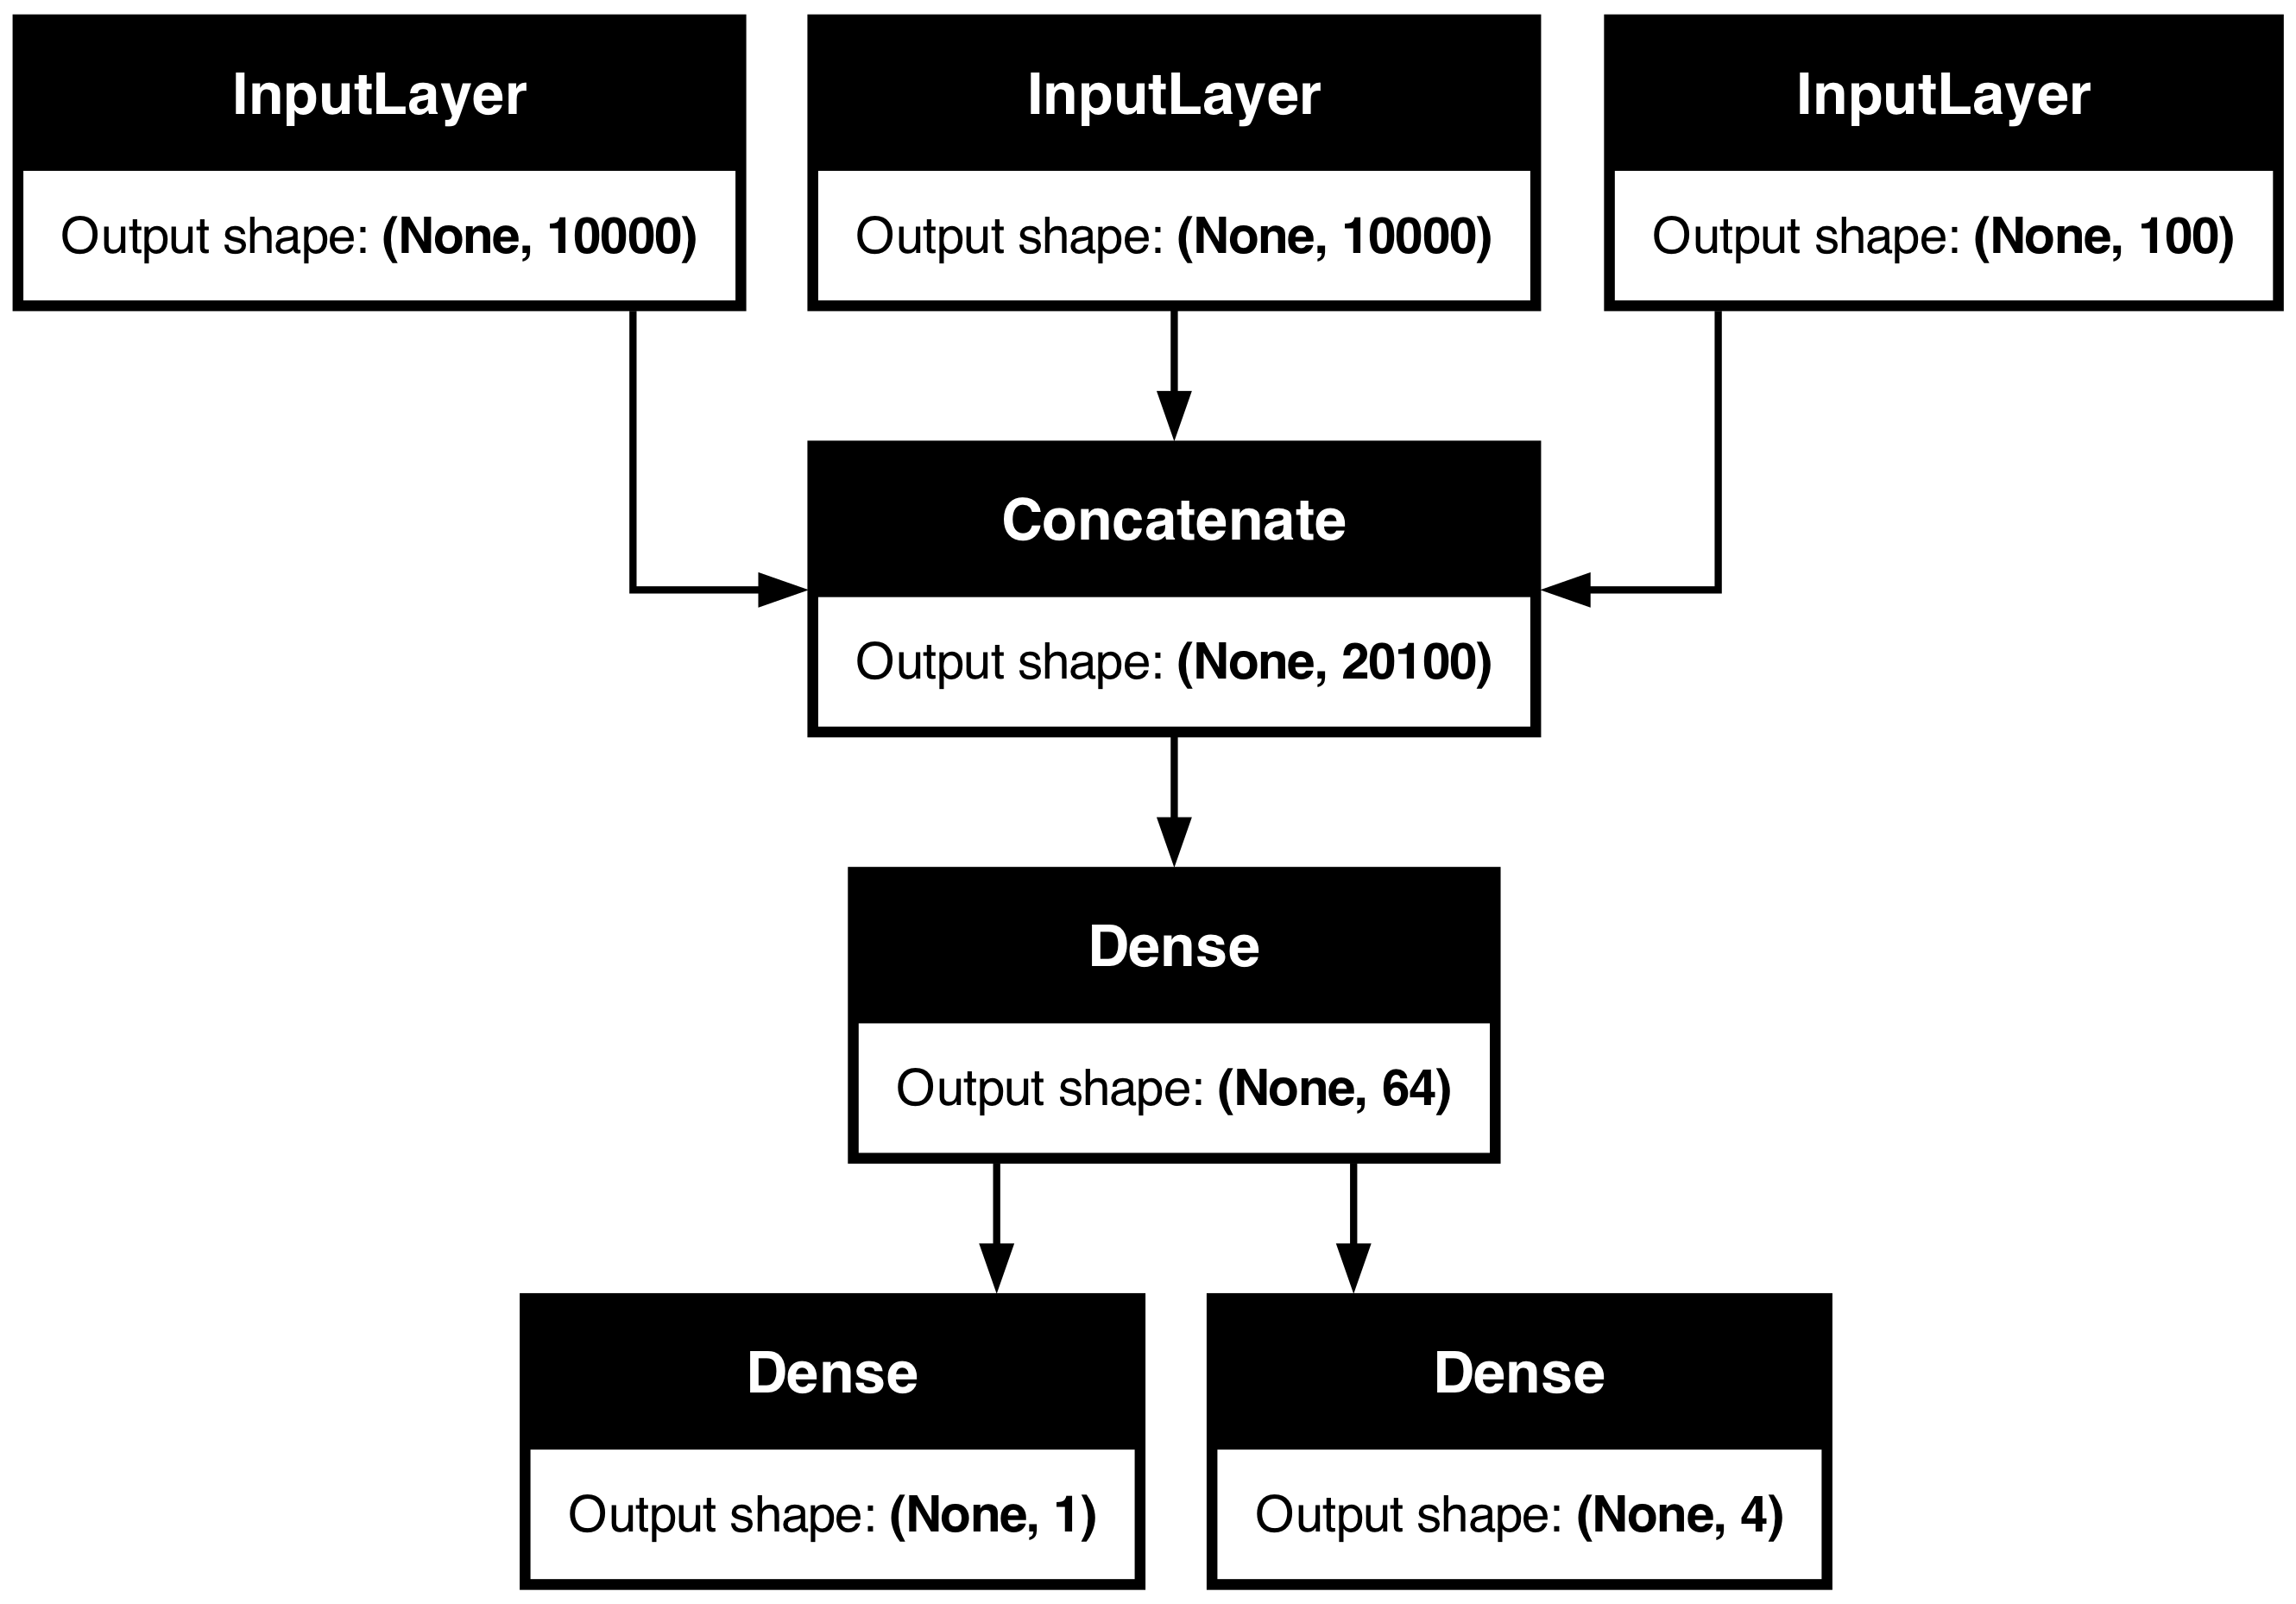

In [26]:
keras.utils.plot_model(model, 'model/multi_in_out_model.png',
                       show_shapes=True, dpi=300) #dpi는 해상도

#### 다중 입력, 다중 출력 모델 훈련하기

- 입력과 타깃 배열 리스트를 전달하여 모델 훈련

In [31]:
import numpy as np
num_samples = 1280
voca_size = 10000
num_tags = 100
num_depart = 4

# Data generation
title_data = np.random.randint(0, 2, size=(num_samples, voca_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, voca_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.random(size=(num_samples, num_depart))

# 모델 컴파일
model.compile(optimizer='rmsprop', 
              loss=['mean_squared_error', 'categorical_crossentropy'],
             metrics = [['mean_squared_error'],['accuracy']])
# 모델 학습(훈련)                       
model.fit([title_data, text_body_data, tags_data], 
          [priority_data, department_data], epochs=1)
                                 
# 모델 평가
model.evaluate([title_data, text_body_data, tags_data], 
          [priority_data, department_data])

# 모델 예측                                 
priority_preds, depart_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.2409 - loss: 44.3883 - priority_mean_squared_error: 0.2952
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - department_accuracy: 0.2570 - loss: 22.1894 - priority_mean_squared_error: 0.3295
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


- 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련

In [32]:
# 모델 컴파일
model.compile(optimizer='rmsprop', 
              loss={'priority': 'mean_squared_error', 
                    'department':'categorical_crossentropy'},
             metrics = {'priority': ['mean_squared_error'],
                        'department': ['accuracy']})
# 모델 학습(훈련)                       
model.fit({'title' : title_data, 'text_body': text_body_data, 'tags': tags_data}, 
          {'priority': priority_data, 'department': department_data}, epochs=1)
                                 
# 모델 평가
model.evaluate({'title': title_data, 'text_body': text_body_data, 
                'tags': tags_data}, 
          {'priority': priority_data,  'department': department_data})

# 모델 예측                                 
priority_preds, depart_preds = model.predict({'title': title_data, 
                                              'text_body': text_body_data, 
                                                'tags': tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.2753 - loss: 43.6943 - priority_mean_squared_error: 0.3289
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - department_accuracy: 0.2362 - loss: 47.7975 - priority_mean_squared_error: 0.3295
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### 함수형 API의 장점 : 층 연결 구조 활용하기

- 함수형 모델은 명시적인 그래프 데이터 구조
- 이전 그래프 노드(층의 출력)를 새 모델의 일부로 재사용 가능
- 모델 시각화와 특성 추출 가능

model.layers 속성
- 모델에 있는 모든 층의 리스트를 가지고 있음
- 각 층의 input과 output을 출력해볼 수 있음
- 특성 추출을 수행하여 다른 모델에서 중간 특성을 재사용하는 모델을 만들 수 있음

In [33]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [34]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [35]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_15>

#### 중간층의 출력을 재사용하여 새로운 모델 만들기

In [38]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)
new_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])
new_model.weights

[<KerasVariable shape=(20100, 64), dtype=float32, path=dense_9/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=dense_9/bias>,
 <KerasVariable shape=(64, 1), dtype=float32, path=priority/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=priority/bias>,
 <KerasVariable shape=(64, 4), dtype=float32, path=department/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=department/bias>,
 <KerasVariable shape=(64, 3), dtype=float32, path=difficulty/kernel>,
 <KerasVariable shape=(3,), dtype=float32, path=difficulty/bias>]

In [39]:
new_model.summary() #difficulty 층이 추가됨

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ difficulty (Dense)  │ (None, 3)         │        195 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,984 (4.91 MB)

 Trainable params: 1,286,984 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

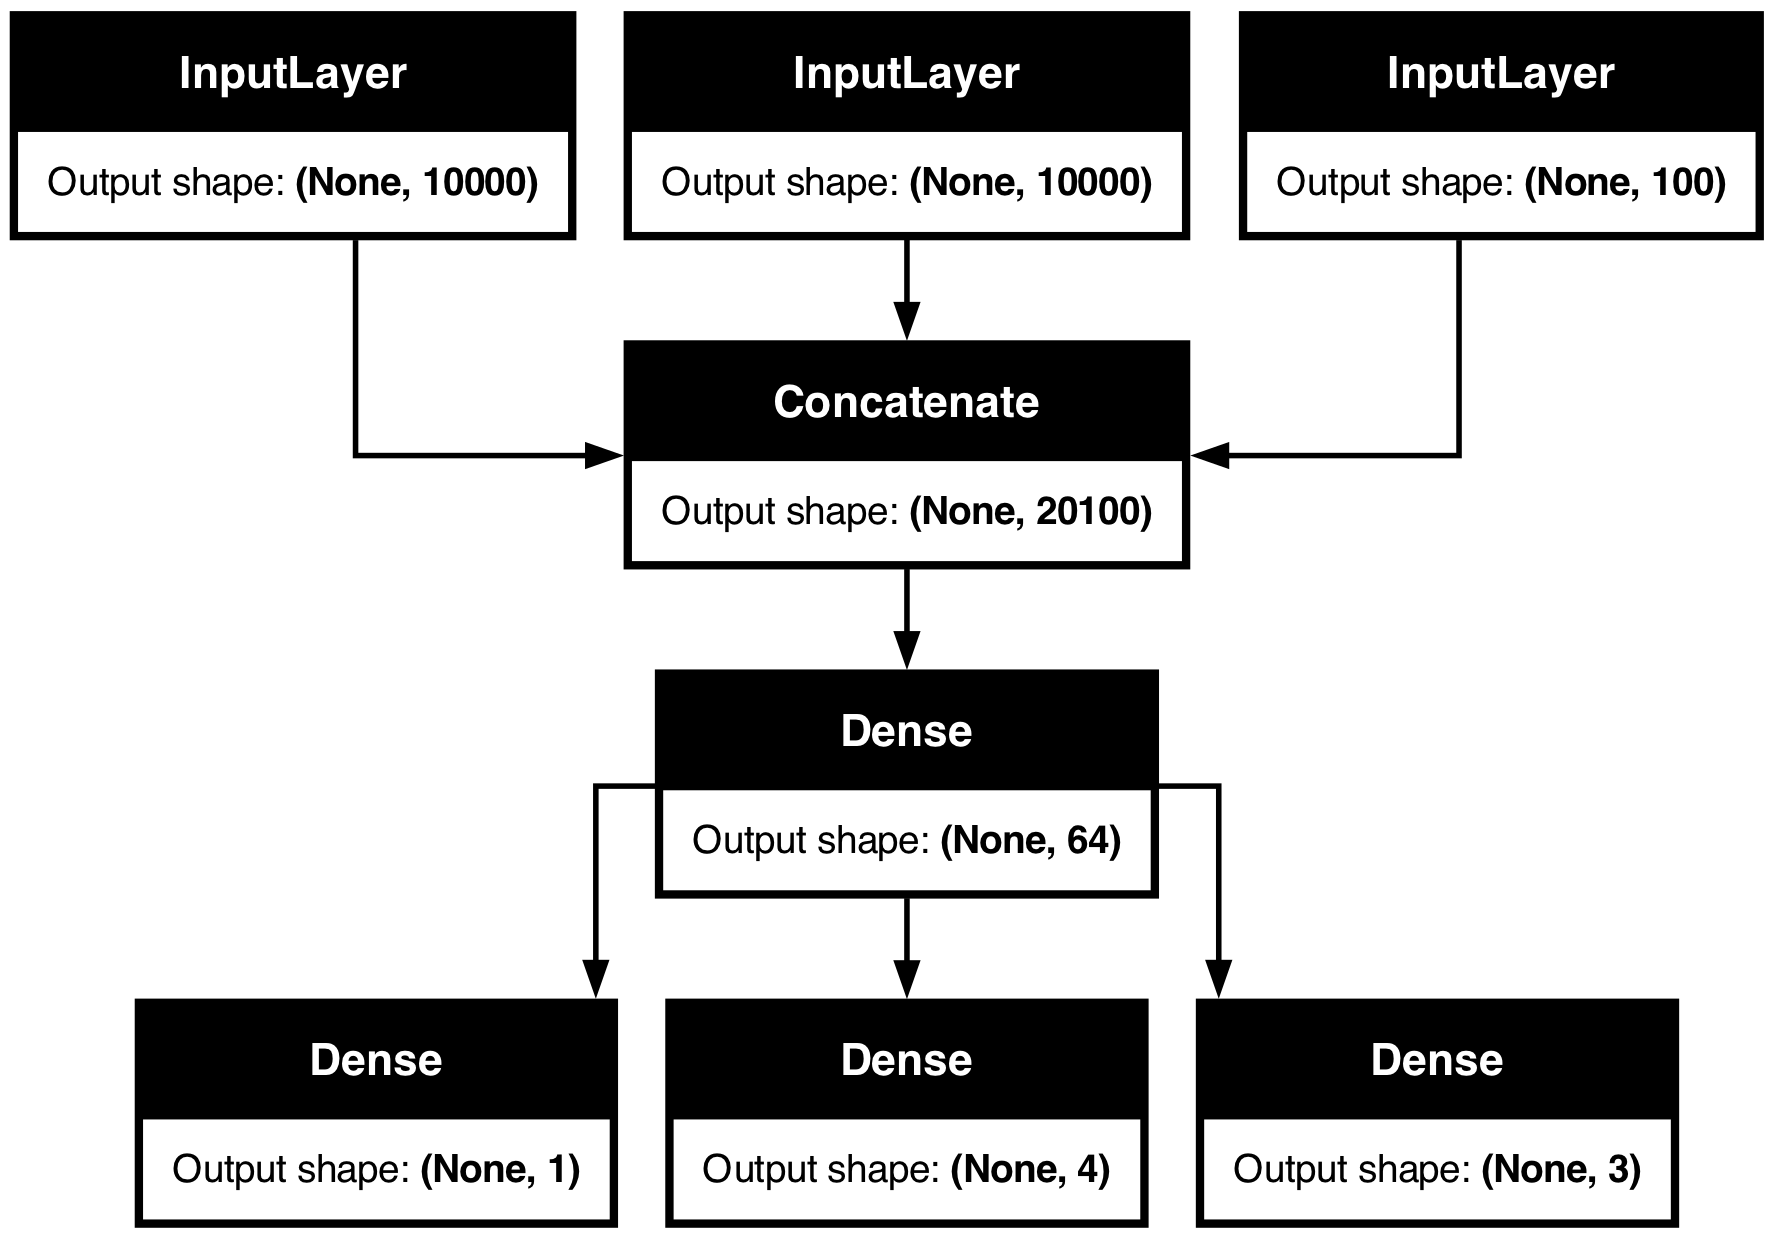

In [40]:
keras.utils.plot_model(new_model, 'update_model.png', show_shapes=True)

### 3. Model 서브클래싱

- Model 클래스를 상속받아 밑바닥 부터 모델을 정의하는 저수준 방법
- 모든 상세한 내용을 완전히 제어하고 싶은 경우 적합
- 여러 가지 케라스 내장 기능을 사용하지 못하므로 실수가 발생할 위험이 많음
- Model 서브클래스 정의
    - __init__() 메서드에서 모델이 사용할 층을 정의
    - call() 메서드에서 앞서 만든 층을 사용하여 모델의 정방향 패스를 정의
- 서브클래스의 객체를 만들고 데이터와 함께 호출하여 가중치를 만듬

#### 간단한 서브클래싱 모델 생성

- 서브클래스 모델 정의

In [42]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')
        
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

- 서브클래스 모델 객체 생성

In [43]:
model = CustomerTicketModel(num_departments=4)
priority, department = model({'title':title_data, 'text_body':text_body_data, 'tags':tags_data})

- 모델 컴파일, 훈련, 평가

In [46]:
# 모델 컴파일
model.compile(optimizer='rmsprop', 
              loss=['mean_squared_error', 'categorical_crossentropy'],
             metrics = [['mean_squared_error'],['accuracy']])
# 모델 학습(훈련)                       
model.fit({'title' : title_data, 'text_body': text_body_data, 'tags': tags_data}, 
          [priority_data, department_data], epochs=1)
                                 
# 모델 평가
model.evaluate({'title': title_data, 'text_body': text_body_data, 
                'tags': tags_data}, 
          [priority_data, department_data])

# 모델 예측                                 
priority_preds, depart_preds = model.predict({'title': title_data, 
                                              'text_body': text_body_data, 
                                                'tags': tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2472 - loss: 45.0831 - mean_squared_error: 0.3122
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2505 - loss: 29.9059 - mean_squared_error: 0.3295
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [47]:
model.summary()

Model: "customer_ticket_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ concatenate_1 (Concatenate)     │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │     1,286,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,573,580 (9.82 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286,791 (4.91 MB)

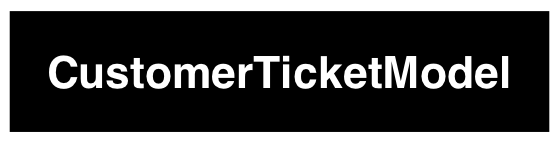

In [48]:
keras.utils.plot_model(model, 'subclass_model.png') #subclass 지원 안함

### 4. 여러 가지 방식을 혼합하여 사용하기

#### 서브클래싱한 모델을 포함하는 함수형 모델 정의

In [49]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2: #num_class가 2면 sigmoid
            num_units = 1
            activation = 'sigmoid'
        else:
            num_units = num_classes
            activation = 'softmax' #나머지는 softmax
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [51]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_14 (Functional)      │ ?                      │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

#### 함수형 모델을 포함하는 서브클래싱 모델 정의

In [50]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation='relu')
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

----